<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений:" data-toc-modified-id="Дерево-решений:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Дерево решений:</a></span></li><li><span><a href="#Случайный-лес:" data-toc-modified-id="Случайный-лес:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Случайный лес:</a></span></li><li><span><a href="#Логистическая-регрессия:" data-toc-modified-id="Логистическая-регрессия:-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Логистическая регрессия:</a></span></li><li><span><a href="#вывод:" data-toc-modified-id="вывод:-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>вывод:</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений:" data-toc-modified-id="Дерево-решений:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Дерево решений:</a></span></li><li><span><a href="#Случайный-лес:" data-toc-modified-id="Случайный-лес:-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Случайный лес:</a></span></li><li><span><a href="#Логистическая-регрессия:" data-toc-modified-id="Логистическая-регрессия:-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Логистическая регрессия:</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

импортируем необходимые библиотеки и сохраним данные о клиентах:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler 

In [2]:
try:
    data=pd.read_csv('Churn.csv') 
except FileNotFoundError:
    data=pd.read_csv('/datasets/Churn.csv')

выведем первые 5 строк таблицы:

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


и выведем информацию о данных:

In [4]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

в `Tenure` обнаружено 909 пустых значений. Заменим их на ноль:

In [5]:
data['Tenure'] = data['Tenure'].fillna(0) 

проверим что пустот больше нет:

In [6]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

проверим данные на явные дубликаты:

In [7]:
data.duplicated().sum()

0

данные выгружаются без ошибок, пустоты обработаны. Разобьем данные на выборки для машинного обучения:

## Исследование задачи

Посмотрим на доли объектов в целевом признаке:

In [8]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

нулей гораздо больше чем единиц: данные не сбалансированы. Обучим данные без учета несбалансированных данных.

уберем из признаков столбцы RowNumber,CustomerId,Surname. Они не нужны для обучения модели

In [9]:
data = data.drop(['RowNumber','CustomerId','Surname'], axis=1)

В наборе данных встречаются категориальные признаки. Чтобы преобразовать категориальные признаки в численные воспользуемся техникой One-Hot Encoding:

In [10]:
data_ohe = pd.get_dummies(data, drop_first=True)

разобьем исходные данные на обучающую выборку, валидационную выборку и тестовую выборку в соотношении 3:1:1. Для этого сначала разделим данные в соотношении 3:2, а затем вторую часть разделим в отношении 1:1 

In [11]:
data_train,data_validtest = train_test_split(data_ohe, test_size=0.4, random_state=12345)

data_valid,data_test=train_test_split(data_validtest, test_size=0.5, random_state=12345)

проверим что данные поделились верно:

In [12]:
print(data_train.shape)
print(data_valid.shape)
print(data_test.shape)

(6000, 12)
(2000, 12)
(2000, 12)


размер выборок поделился в отношении 6000:2000:2000, то есть в отношении 3:1:1. Все верно

выделим обучающий набор данных:

признаки:

In [13]:
features_train = data_train.drop(['Exited'], axis=1)

целевой признак:

In [14]:
target_train = data_train['Exited']

In [15]:
type(features_train)

pandas.core.frame.DataFrame

In [16]:
type(target_train)

pandas.core.series.Series

и аналогично для валидационной и тестовой выборок:

In [632]:
features_valid = data_valid.drop(['Exited'], axis=1)
target_valid = data_valid['Exited']

In [633]:
features_test = data_test.drop(['Exited'], axis=1)
target_test = data_test['Exited']

целевой признак является категорийным, поэтому у нас стоит задача классификации. Обучим модель дерева принятия решений с параметром random_state=12345 и узнаем при каком значении максимальной глубины дерева max_depth будет максимальное значение метрики f1

### Дерево решений:

In [634]:
best_depth = 0
best_result = 0

for i in range(1,30):
    model_tree = DecisionTreeClassifier(max_depth=i,random_state=12345)
    model_tree.fit(features_train,target_train)
    predictions_valid=model_tree.predict(features_valid)
    result=f1_score(target_valid, predictions_valid)
    if result > best_result:
        best_depth = i 
        best_result = result 

print('наилучшая глубина дерева',best_depth)
print('наилучшее значение f1',best_result)

наилучшая глубина дерева 9
наилучшее значение f1 0.5786516853932585


теперь попробуем обучить модель случайного леса и выяснить количество деревьев `n_estimators` при котором достигается максимальное значение метрики f1. Так как случайный лес представляет собой набор из случайных деревьев f1 должна быть выше. Укажем параметр `max_depth=9` основываясь на предыдущем обучении.

### Случайный лес:

In [635]:
best_depth = 0
best_result = 0

for i in range(1,120,5):
    model_forest = RandomForestClassifier(n_estimators=i,max_depth=9,random_state=12345) 
    model_forest.fit(features_train,target_train)
    predictions_valid=model_forest.predict(features_valid)
    result=f1_score(target_valid, predictions_valid)
    if result > best_result:
        best_depth = i
        best_result = result 
    
    
print('наилучшее число деревьев',best_depth)
print('наилучшее значение f1',best_result)

наилучшее число деревьев 6
наилучшее значение f1 0.5807407407407408


f1 действительно стало чуть выше, теперь попробуем обучить модель логистической регрессии:

### Логистическая регрессия:

In [636]:
best_depth = 0
best_result = 0

for i in range(200, 1000,50):
    model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=i) 
    model.fit(features_train,target_train)
    predictions_valid=model.predict(features_valid)
    result=f1_score(target_valid, predictions_valid)
    if result > best_result:
        best_depth = i
        best_result = result 
    
print('наилучшая количество деревьев',best_depth)
print('наилучшая точность',best_result)

наилучшая количество деревьев 200
наилучшая точность 0.08750000000000001


метрика F1 для логистической регрессии крайне мала.

### вывод:
Для данных хуже всего предсказывает модель логистической регрессии. Лучше всего - модель случайного леса с максимальной глубиной дерева равной 9.

## Борьба с дисбалансом

чтобы маштабировать признаки запишем все численных признаки в список  `numeric`

In [637]:
numeric = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

Создадим объект scaler и обучим его на обучающих данных. 

In [638]:
scaler = StandardScaler()
scaler.fit(features_train[numeric]) 

StandardScaler()

и сохраним обучающие, валидационные и тестирующие выборки:

In [639]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric]) 
features_test[numeric] = scaler.transform(features_test[numeric]) 

Чтобы сбалансировать данные укажем гиперпараметр `class_weight='balanced'` чтобы изменить вес классов : 

### Дерево решений:

In [640]:
best_depth = 0
best_result = 0

for i in range(1,30):
    model_tree = DecisionTreeClassifier(class_weight='balanced',max_depth=i,random_state=12345)
    model_tree.fit(features_train,target_train)
    predictions_valid=model_tree.predict(features_valid)
    result=f1_score(target_valid, predictions_valid)
    if result > best_result:
        best_depth = i 
        best_result = result 

print('наилучшая глубина дерева',best_depth)
print('наилучшее значение f1',best_result)

наилучшая глубина дерева 5
наилучшее значение f1 0.5963791267305644


значение метрики улучшилось, теперь обучим модель случайного леса с взвешенными классами:

### Случайный лес:

In [641]:
best_depth = 0
best_result = 0

for i in range(1, 100,5):
    model_forest = RandomForestClassifier(class_weight='balanced',n_estimators=i,max_depth=5,random_state=12345) 
    model_forest.fit(features_train,target_train)
    predictions_valid=model_forest.predict(features_valid)
    result=f1_score(target_valid, predictions_valid)
    if result > best_result:
        best_depth = i
        best_result = result 
    
    
print('наилучшее число деревьев',best_depth)
print('наилучшее значение f1',best_result)

наилучшее число деревьев 61
наилучшее значение f1 0.6126482213438735


Значение f1 увеличилось. 

### Логистическая регрессия:

In [642]:
best_depth = 0
best_result = 0

for i in range(200, 1000,50):
    model = LogisticRegression(class_weight='balanced',random_state=12345, solver='lbfgs', max_iter=i) 
    model.fit(features_train,target_train)
    predictions_valid=model.predict(features_valid)
    result=f1_score(target_valid, predictions_valid)
    if result > best_result:
        best_depth = i
        best_result = result 
    
print('наилучшая количество деревьев',best_depth)
print('наилучшая точность',best_result)

наилучшая количество деревьев 200
наилучшая точность 0.4888888888888888


Значение f1 увеличилось для логистической регрессии, но все равно самое плохое из трех моделей. 

###  Увеличение выборки

Попробуем увеличить долю единиц в выборке чтобы модель лучше научилась их предсказывать. Для этого используем функцию upsample

In [643]:
def upsample(features, target, repeat):
    #выделим отрицательные и положительные объекты:
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    #создадим новую обучающую выборку 
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    #перемешам данные;
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

Обучим модель случайного дерева и сравним метрику f1 с аналогичной метрикой. Значение repeat будет равно 4, потому что единиц в 4 раза меньше нулей. 

In [644]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model = DecisionTreeClassifier(max_depth=9,random_state=12345)
model.fit(features_upsampled,target_upsampled)
predictions_valid=model.predict(features_valid)

In [645]:
f1_score(target_valid, predictions_valid)

0.5304518664047152

Значение меньше чем в случае несбалансированых классов и в случае обученной модели с измененным весом классов.

In [646]:
model = RandomForestClassifier(n_estimators=41,max_depth=5,random_state=12345) 
model.fit(features_upsampled,target_upsampled)
predictions_valid=model.predict(features_valid)

In [647]:
f1_score(target_valid, predictions_valid)

0.6017699115044247

Значение лучше чем в случае несбалансированых классов. Но хуже в случае обученной модели с измененным весом классов.

In [648]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=200) 
model.fit(features_upsampled,target_upsampled)
predictions_valid=model.predict(features_valid)

In [649]:
f1_score(target_valid, predictions_valid)

0.4888888888888888

Значение для логистической регрессии все еще хуже всех остальных.

###  Уменьшение выборки

Вместо увеличения количества единиц попробуем уменьшить количество нулей. Для этого используем функцию downsample

In [650]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [651]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

обучим случайное дерево, случайный лес и Логистическую регрессию на полученных данных:

In [652]:
model = DecisionTreeClassifier(max_depth=9,random_state=12345)
model.fit(features_downsampled,target_downsampled)
predictions_valid=model.predict(features_valid)

In [653]:
f1_score(target_valid, predictions_valid)

0.5355493998153279

In [654]:
model = RandomForestClassifier(n_estimators=41,max_depth=5,random_state=12345) 
model.fit(features_downsampled,target_downsampled)
predictions_valid=model.predict(features_valid)

In [655]:
f1_score(target_valid, predictions_valid)

0.5906542056074765

In [656]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=200) 
model.fit(features_downsampled,target_downsampled)
predictions_valid=model.predict(features_valid)

In [657]:
f1_score(target_valid, predictions_valid)

0.4892703862660944

ни одна из моделей обученная на уменьшенных данных не работает лучше.

## Тестирование модели

Для обучения модели применим самую успешную модель, а именно модель случайного леса с числом деревьев 24, максимальной глубиной дерева 5 и сбалансированными классами. 


объеденим тренировочную и валидационную выборки для лучшего обучения модели:

In [658]:
features_train = pd.concat([features_train] + [features_valid])
target_train = pd.concat([target_train] + [target_valid])

In [659]:
features_train.shape

(8000, 11)

In [660]:
target_train.shape

(8000,)

In [661]:
model_forest = RandomForestClassifier(class_weight='balanced',n_estimators=41,max_depth=5,random_state=12345) 

Обучим модель на обучающих данных:

In [662]:
model_forest.fit(features_train,target_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=41,
                       random_state=12345)

и сделаем предсказание используя тестовую выборку:

In [663]:
predictions=model_forest.predict(features_test)

In [664]:
f1_score(target_test, predictions)

0.594758064516129

Построим график ROC-кривую и измерим AUC ROC

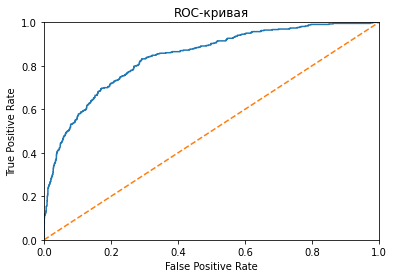

In [665]:
probabilities_test = model_forest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')


#построим также ROC-кривая случайной модели 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.show()

Посчитаем значение AUC ROC:

In [666]:
auc_roc=roc_auc_score(target_test, probabilities_one_test)

print(auc_roc)

0.8408048018876552


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*